# Dataloaders for Multiple HAR Datasets
This notebook implements data loading and preprocessing for six Human Activity Recognition (HAR) datasets.
The purpose is to provide a standardized pipeline for preparing multiple HAR datasets for machine learning
and federated learning experiments.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import dataloading
import os
from sklearn.decomposition import PCA
import scipy

# Dataset 1: HARSense

n_features = 16, n_labels = 6

### Experiment 1: n_clients = 1, model = [16, 10, 6], n_epochs = 5
train_set_accuracy: 0.809
test_set_accuracy: 0.795

In [2]:
df1 = dataloading.load_data1()
df1.head()

,AG-X,AG-Y,AG-Z,Acc-X,Acc-Y,Acc-Z,Gravity-X,Gravity-Y,Gravity-Z,RR-X,RR-Y,RR-Z,RV-X,RV-Y,RV-Z,cos,activity
0,-9.494311,5.423363,0.196757,-1.684995,0.401508,1.334339,-8.855526,4.199663,-0.335983,-0.762366,-0.750471,1.109060,0.232662,0.672025,0.101603,0.695649,Running
1,-8.890651,2.520043,0.963310,-0.895032,-1.936677,1.436671,-8.399648,5.060810,0.067106,-0.613229,-0.121966,1.906942,0.245168,0.660660,0.131849,0.697164,Running
2,-5.632800,1.581015,0.230293,2.350318,-3.642859,-1.169414,-7.911231,5.790931,0.218930,-0.142383,-0.352063,1.759936,0.264845,0.648175,0.163016,0.695091,Running
3,-6.322698,6.228244,-0.756644,0.812825,-0.722664,-0.334024,-7.523226,6.280006,0.364660,-0.148775,-0.382955,1.208129,0.299550,0.624335,0.195080,0.694564,Running
4,-7.640211,4.862821,1.715490,0.349670,-0.468074,-0.378780,-6.921238,6.909286,0.727059,-1.047857,0.379773,0.828895,0.310003,0.607825,0.220415,0.697039,Running


In [4]:
X_train,y_train,X_test,y_test,labels = dataloading.train_test_split(df1,test_size=0.8)
print(f"X_train: {X_train.shape}, y_train: {y_train.shape}, X_test: {X_test.shape}, y_test: {y_test.shape}")

X_train: (18839, 16), y_train: (18839,), X_test: (75359, 16), y_test: (75359,)


In [5]:
client_data = dataloading.to_client(data=(X_train,y_train,X_test,y_test),max_clients=1)
dataloading.save_client_data(client_data,"dataset_1_experiment_1")

# Dataset 2: HAR using smartphones

n_features = 561, n_labels = 6

### Experiment 1: n_clients = 1, model = [12, 10, 6], n_epochs = 5, n_pca_features = 12
train_set_accuracy: 0.9
test_set_accuracy: 0.87

In [11]:
df2 = dataloading.load_data2()
print(df2.shape)
df2.head()

(10299, 562)


,0,1,2,3,4,5,6,7,8,9,...,552,553,554,555,556,557,558,559,560,activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,laying
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,laying
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.390748,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,laying
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.117290,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,laying
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.351471,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,laying


In [19]:
# to many features. PCA them (keep 12 for the time being. ~80% of explained variance)
pca = PCA(n_components=12, svd_solver='full')
data2 = pca.fit_transform(df2.iloc[:,0:-1].to_numpy())

In [23]:
df2_pca = pd.concat([pd.DataFrame(data2).astype('float32'),pd.DataFrame(df2['activity'].reset_index(drop=True))],axis=1)
df2_pca.head()

,0,1,2,3,4,5,6,7,8,9,10,11,activity
0,-5.532306,-0.713080,-1.425739,1.761952,-0.842171,-0.428720,0.279745,0.839325,-1.333017,-0.168956,-0.272959,0.399628,laying
1,-5.558568,-0.576110,-1.842062,0.816206,-0.554598,1.003947,-0.125675,-0.732936,-0.942399,0.586729,0.125540,-0.124013,laying
2,-5.493743,-0.290346,-2.153850,0.598862,0.043660,-0.030991,0.047537,0.089552,-0.213861,0.214159,0.154228,0.227560,laying
3,-5.695271,0.358930,-2.156196,0.351608,-0.769463,1.031169,0.486559,-0.442267,0.395172,-0.257603,0.462661,-0.645857,laying
4,-5.764235,0.564788,-2.369786,0.345952,-0.419203,0.369863,0.184831,-0.033604,0.429315,-0.268201,0.561680,-0.239655,laying


In [24]:
X_train,y_train,X_test,y_test,labels = dataloading.train_test_split(df2_pca,test_size=0.8)
print(f"X_train: {X_train.shape}, y_train: {y_train.shape}, X_test: {X_test.shape}, y_test: {y_test.shape}")

X_train: (2059, 12), y_train: (2059,), X_test: (8240, 12), y_test: (8240,)


In [26]:
client_data = dataloading.to_client(data=(X_train,y_train,X_test,y_test),max_clients=1)
dataloading.save_client_data(client_data,"dataset_2_experiment_1")

saving partition_0.txt
X_train
y_train
X_test
y_test


# Dataset 3: Pamap2

n_features = 51 (47 after removal of constant non variable attributes), n_labels = 24

### Experiment 1: n_clients = 1, model = [39, 10, 24], n_epochs = 5
train_set_accuracy: 0.99
test_set_accuracy: 0.98

In [2]:
df3 = dataloading.load_data3(n_subjects=1)
df3.head()

,activity,0,1,2,3,4,5,6,7,8,...,41,42,43,44,45,46,47,48,49,50
0,lying,30.375,2.21530,8.27915,5.58753,2.24689,8.55387,5.77143,-0.004750,0.037579,...,0.002908,-0.027714,0.001752,-61.1081,-36.8636,-58.3696,1.0,0.0,0.0,0.0
1,lying,30.375,2.29196,7.67288,5.74467,2.27373,8.14592,5.78739,-0.171710,0.025479,...,0.020882,0.000945,0.006007,-60.8916,-36.3197,-58.3656,1.0,0.0,0.0,0.0
2,lying,30.375,2.29090,7.14240,5.82342,2.26966,7.66268,5.78846,-0.238241,0.011214,...,-0.035392,-0.052422,-0.004882,-60.3407,-35.7842,-58.6119,1.0,0.0,0.0,0.0
3,lying,30.375,2.21800,7.14365,5.89930,2.22177,7.25535,5.88000,-0.192912,0.019053,...,-0.032514,-0.018844,0.026950,-60.7646,-37.1028,-57.8799,1.0,0.0,0.0,0.0
4,lying,30.375,2.30106,7.25857,6.09259,2.20720,7.24042,5.95555,-0.069961,-0.018328,...,0.001351,-0.048878,-0.006328,-60.2040,-37.1225,-57.8847,1.0,0.0,0.0,0.0


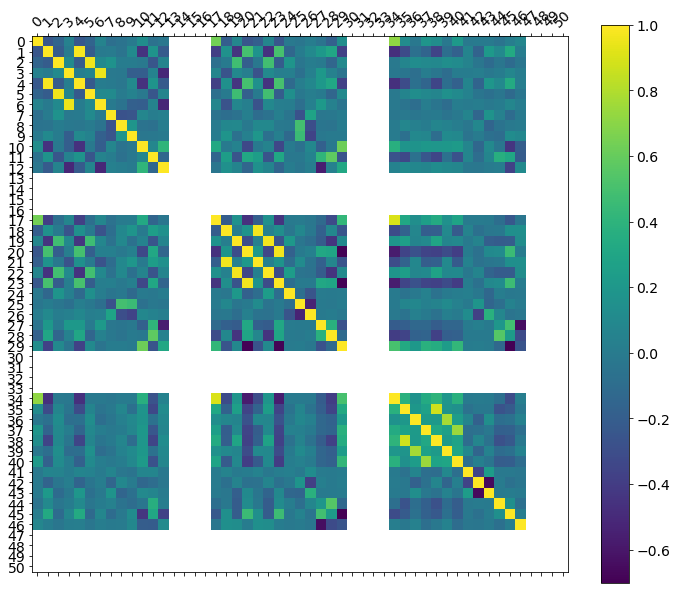

In [3]:
dataloading.correlation_matrix(df3)

/Users/admin/Desktop/thesis/code/on-device-fed-learning/data_factory/dataloading.py:529: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()
/Users/admin/Desktop/thesis/code/on-device-fed-learning/data_factory/dataloading.py:529: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()
/Users/admin/Desktop/thesis/code/on-device-fed-learning/data_factory/dataloading.py:529: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed

/Users/admin/Desktop/thesis/code/on-device-fed-learning/data_factory/dataloading.py:529: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()
/Users/admin/Desktop/thesis/code/on-device-fed-learning/data_factory/dataloading.py:529: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()
/Users/admin/Desktop/thesis/code/on-device-fed-learning/data_factory/dataloading.py:529: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed

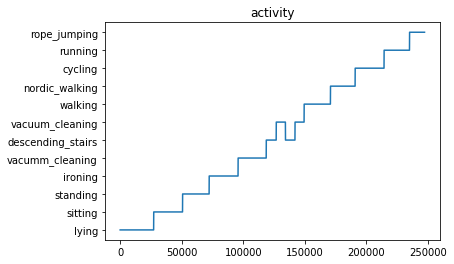

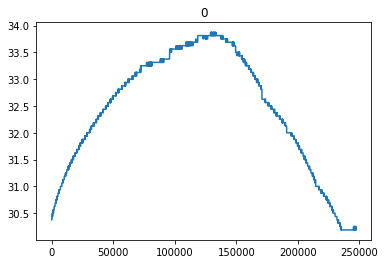

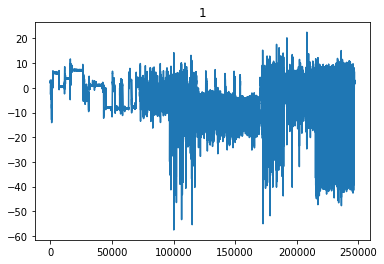

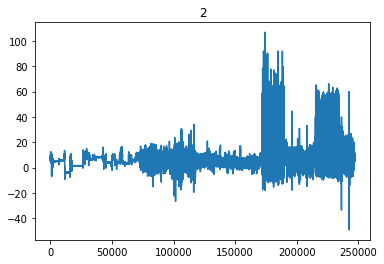

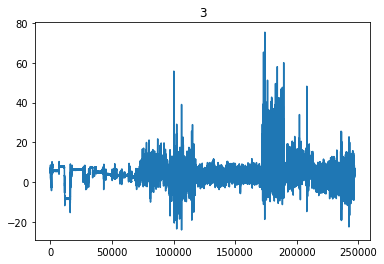

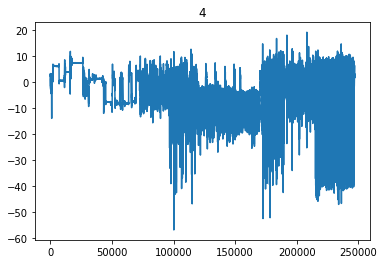

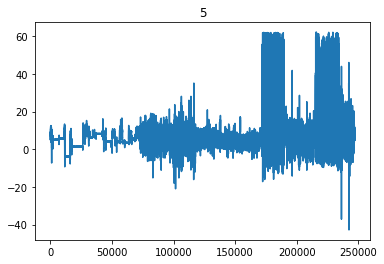

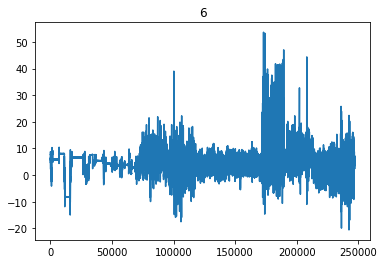

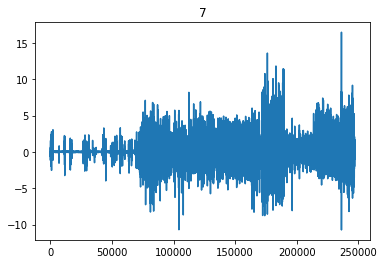

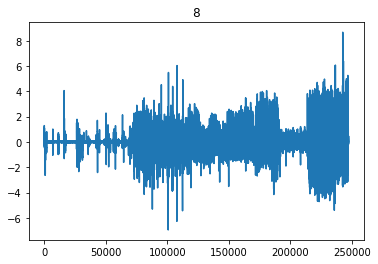

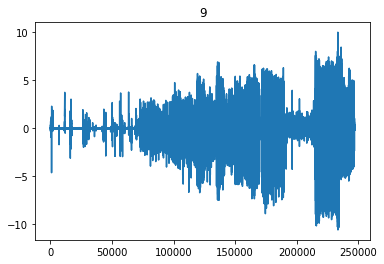

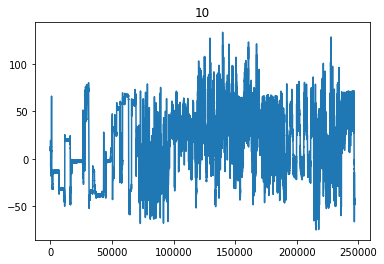

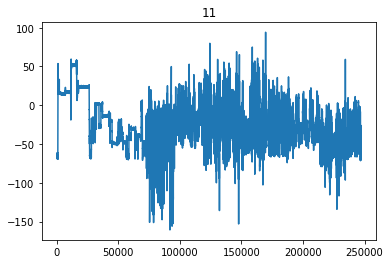

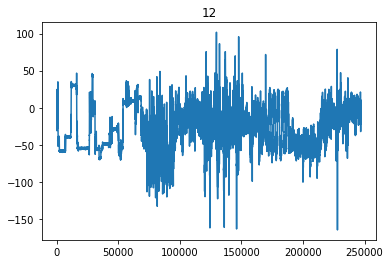

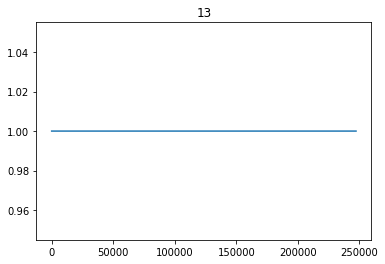

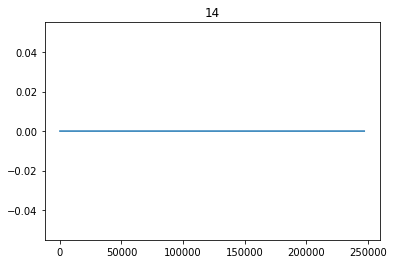

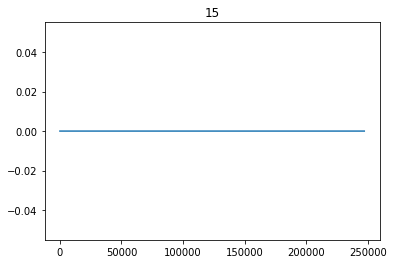

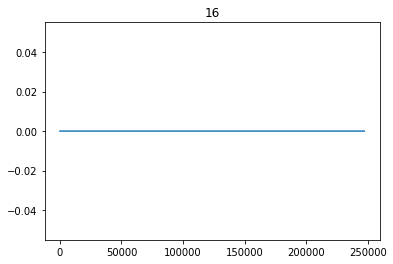

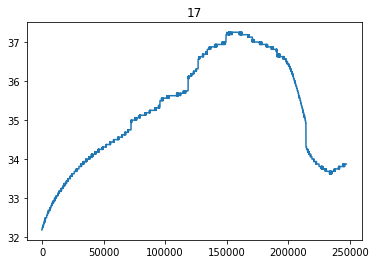

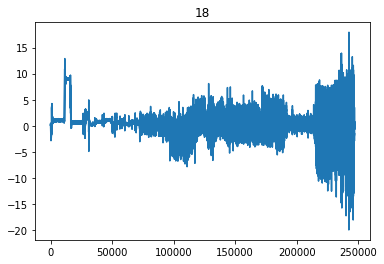

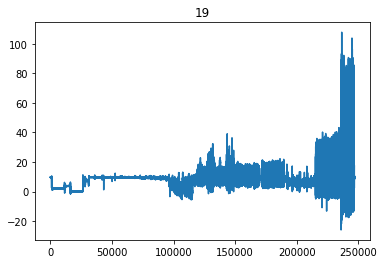

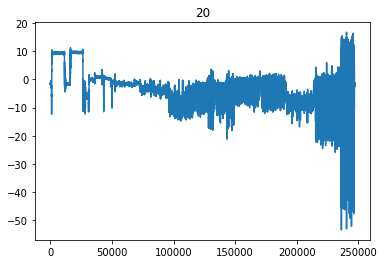

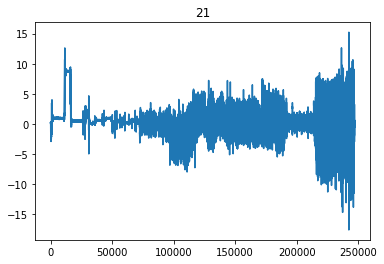

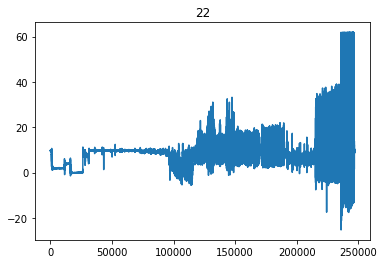

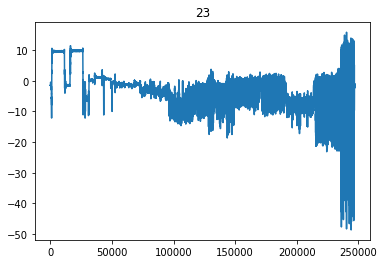

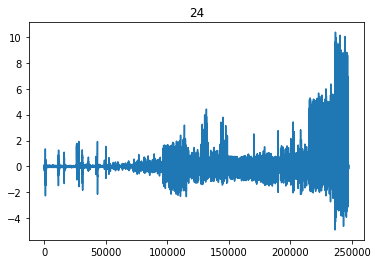

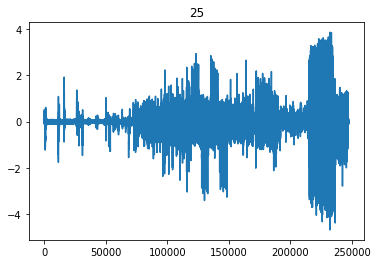

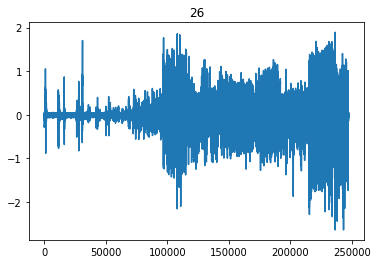

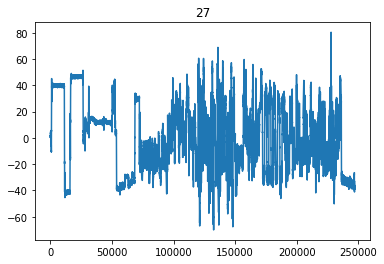

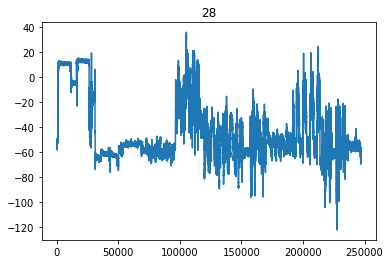

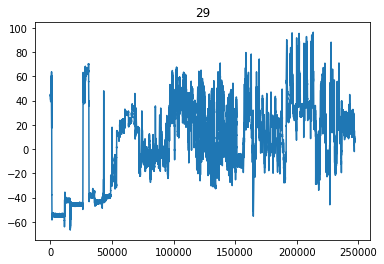

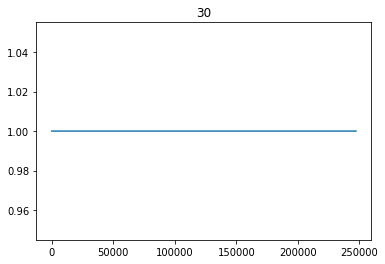

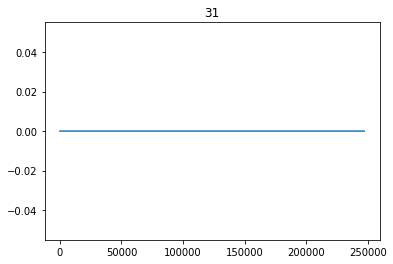

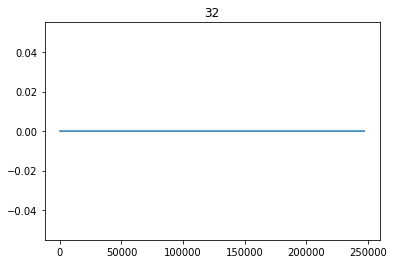

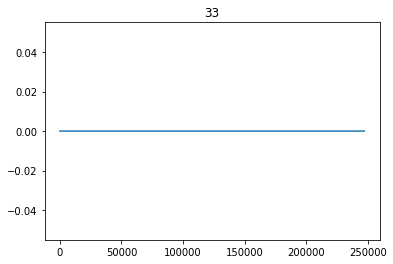

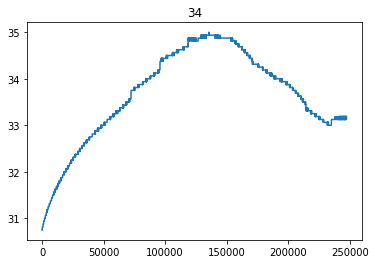

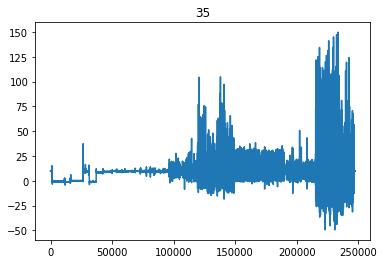

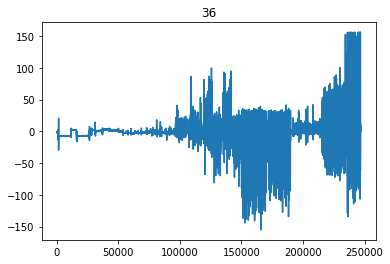

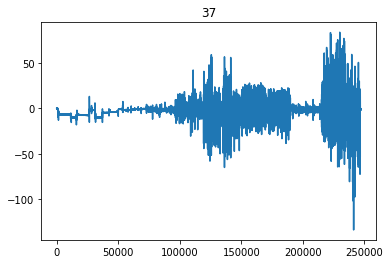

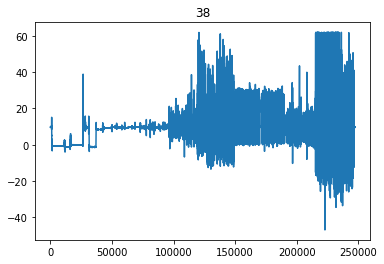

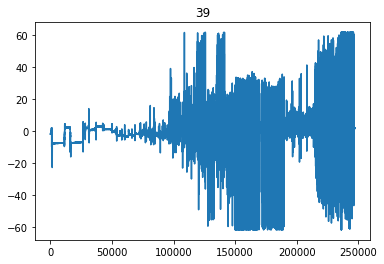

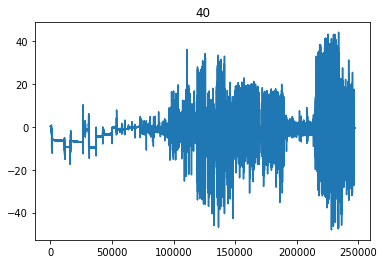

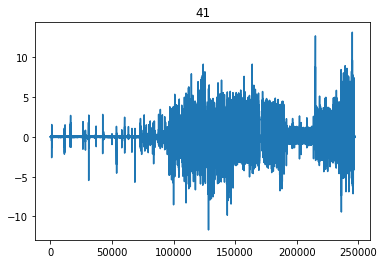

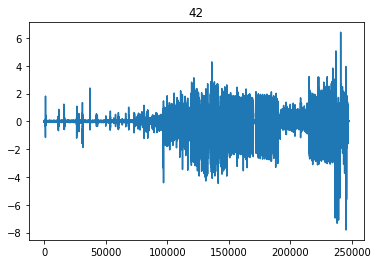

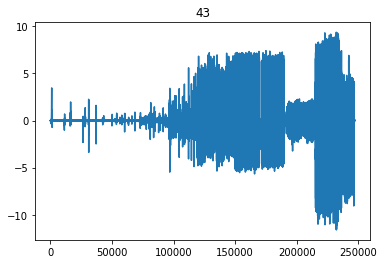

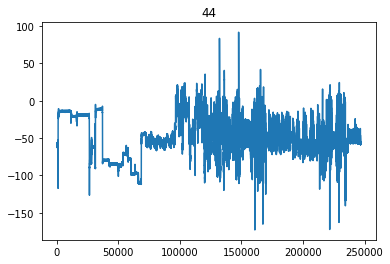

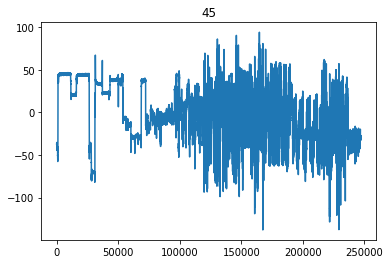

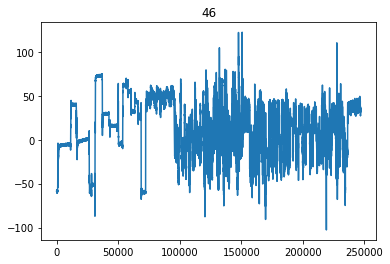

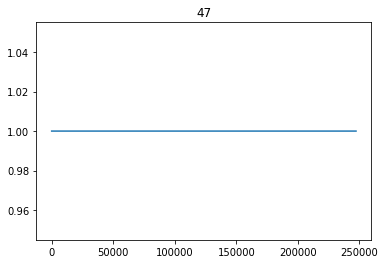

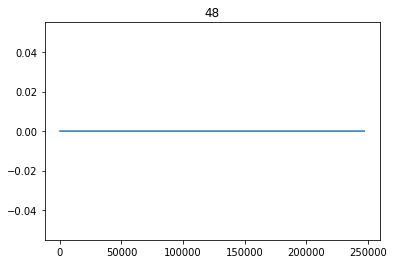

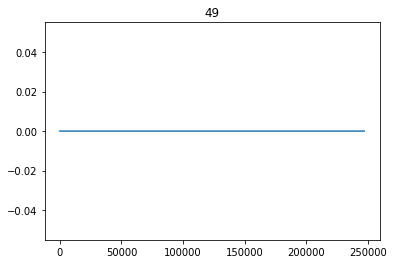

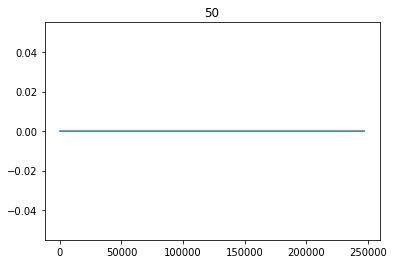

In [4]:
dataloading.plot_features(df3)

In [5]:
# remove zero information features: 13,14,15,16,30,31,32,33,47,48,49,50
df3.drop([13,14,15,16,30,31,32,33,47,48,49,50],axis=1,inplace=True)

In [15]:
print(df3.head())
print(df3.shape)

  activity       0        1        2        3        4        5        6  \
0    lying  30.375  2.21530  8.27915  5.58753  2.24689  8.55387  5.77143   
1    lying  30.375  2.29196  7.67288  5.74467  2.27373  8.14592  5.78739   
2    lying  30.375  2.29090  7.14240  5.82342  2.26966  7.66268  5.78846   
3    lying  30.375  2.21800  7.14365  5.89930  2.22177  7.25535  5.88000   
4    lying  30.375  2.30106  7.25857  6.09259  2.20720  7.24042  5.95555   

          7         8  ...        37       38       39        40        41  \
0 -0.004750  0.037579  ...  0.095156  9.63162 -1.76757  0.265761  0.002908   
1 -0.171710  0.025479  ... -0.020804  9.58649 -1.75247  0.250816  0.020882   
2 -0.238241  0.011214  ... -0.059173  9.60196 -1.73721  0.356632 -0.035392   
3 -0.192912  0.019053  ...  0.094385  9.58674 -1.78264  0.311453 -0.032514   
4 -0.069961 -0.018328  ...  0.095775  9.64677 -1.75240  0.295902  0.001351   

         42        43       44       45       46  
0 -0.027714  0.001752 -

In [7]:
X_train,y_train,X_test,y_test,labels = dataloading.train_test_split(df3,test_size=0.8)
print(f"X_train: {X_train.shape}, y_train: {y_train.shape}, X_test: {X_test.shape}, y_test: {y_test.shape}")

X_train: (49441, 39), y_train: (49441,), X_test: (197767, 39), y_test: (197767,)


In [8]:
client_data = dataloading.to_client(data=(X_train,y_train,X_test,y_test),max_clients=1)
dataloading.save_client_data(client_data,"dataset_3_experiment_1")

saving partition_0.txt
X_train
y_train
X_test
y_test


# Dataset4: MHealth

n_features = 23, n_labels = 12

### Experiment 1: n_clients = 1, model = [23, 10, 12], n_epochs = 5
train_set_accuracy: 0.86
test_set_accuracy: 0.86

In [10]:
df4 = dataloading.load_data4()
df4.head()

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,activity
6656,-9.7788,0.55690,1.19750,0.008373,-0.033490,2.6493,-9.4517,0.37683,-0.20965,-0.88931,...,-2.8439,-9.0618,1.8177,-0.058824,-0.93429,-0.34483,0.355370,-0.37003,-0.35020,1.0
6657,-9.7733,0.27880,0.73036,-0.025118,-0.025118,2.4157,-9.5306,0.40179,-0.20965,-0.88931,...,-2.9935,-9.2048,1.5189,-0.058824,-0.93429,-0.34483,0.719910,0.17803,0.37363,1.0
6658,-9.8609,0.11561,0.79988,0.025118,0.016745,2.3865,-9.5991,0.48141,-0.20037,-0.86867,...,-2.8846,-9.1945,1.5507,-0.058824,-0.93429,-0.34483,0.355370,-0.37003,-0.35020,1.0
6659,-9.7409,0.17652,0.88957,0.180010,0.129770,2.3758,-9.5997,0.42919,-0.20037,-0.86867,...,-2.9245,-9.1746,1.5413,-0.078431,-0.93429,-0.34052,0.357180,-0.18858,-0.35198,1.0
6660,-9.7821,0.21637,0.90368,0.092098,0.046049,2.3239,-9.5406,0.40038,-0.20037,-0.86867,...,-2.8963,-9.2039,1.6127,-0.078431,-0.93429,-0.34052,-0.001887,-0.18867,-0.72017,1.0


In [11]:
X_train,y_train,X_test,y_test,labels = dataloading.train_test_split(df4,test_size=0.8)
print(f"X_train: {X_train.shape}, y_train: {y_train.shape}, X_test: {X_test.shape}, y_test: {y_test.shape}")

X_train: (68639, 23), y_train: (68639,), X_test: (274556, 23), y_test: (274556,)


In [12]:
client_data = dataloading.to_client(data=(X_train,y_train,X_test,y_test),max_clients=1)
dataloading.save_client_data(client_data,"dataset_4_experiment_1")

saving partition_0.txt
X_train
y_train
X_test
y_test


# Dataset5: MHealth

n_features = 12, n_labels = 6

### Experiment 1: n_clients = 1, model = [12, 10, 6], n_epochs = 5
train_set_accuracy: 0.889
test_set_accuracy: 0.889

In [17]:
df5 = dataloading.load_data5()
df5.head()

,activity,subject,lw_x,lw_y,lw_z,lh_x,lh_y,lh_z,la_x,la_y,la_z,ra_x,ra_y,ra_z
35216,clapping,0,0.094,0.703,-0.703,0.293,-0.926,-0.250,-0.152,-0.953,0.117,-0.156,0.992,0.082
35217,clapping,0,0.172,0.699,-0.730,0.293,-0.922,-0.250,-0.160,-0.953,0.113,-0.156,0.992,0.086
35218,clapping,0,0.258,0.695,-0.762,0.293,-0.922,-0.254,-0.160,-0.953,0.113,-0.156,1.000,0.078
35219,clapping,0,0.348,0.711,-0.793,0.289,-0.918,-0.254,-0.156,-0.957,0.113,-0.152,1.004,0.074
35220,clapping,0,0.438,0.734,-0.797,0.289,-0.922,-0.254,-0.156,-0.957,0.117,-0.156,1.008,0.078


In [22]:
# drop subject column
df5.drop(['subject'],axis=1,inplace=True)

In [23]:
df5.head()

,activity,lw_x,lw_y,lw_z,lh_x,lh_y,lh_z,la_x,la_y,la_z,ra_x,ra_y,ra_z
35216,clapping,0.094,0.703,-0.703,0.293,-0.926,-0.250,-0.152,-0.953,0.117,-0.156,0.992,0.082
35217,clapping,0.172,0.699,-0.730,0.293,-0.922,-0.250,-0.160,-0.953,0.113,-0.156,0.992,0.086
35218,clapping,0.258,0.695,-0.762,0.293,-0.922,-0.254,-0.160,-0.953,0.113,-0.156,1.000,0.078
35219,clapping,0.348,0.711,-0.793,0.289,-0.918,-0.254,-0.156,-0.957,0.113,-0.152,1.004,0.074
35220,clapping,0.438,0.734,-0.797,0.289,-0.922,-0.254,-0.156,-0.957,0.117,-0.156,1.008,0.078


In [24]:
X_train,y_train,X_test,y_test,labels = dataloading.train_test_split(df5,test_size=0.8)
print(f"X_train: {X_train.shape}, y_train: {y_train.shape}, X_test: {X_test.shape}, y_test: {y_test.shape}")

X_train: (1197661, 12), y_train: (1197661,), X_test: (4790645, 12), y_test: (4790645,)


In [25]:
# experiment_1: n_devices = 1
client_data = dataloading.to_client(data=(X_train,y_train,X_test,y_test),max_clients=5)
dataloading.save_client_data(client_data,"dataset_5_experiment_1")

saving partition_0.txt
X_train
y_train
X_test
y_test
saving partition_1.txt
X_train
y_train
X_test
y_test
saving partition_2.txt
X_train
y_train
X_test
y_test
saving partition_3.txt
X_train
y_train
X_test
y_test
saving partition_4.txt
X_train
y_train
X_test
y_test


# Dataset6: acc data

n_features = 12, n_labels = 6

### Experiment 1: n_clients = 1, model = [12, 10, 6], n_epochs = 5
train_set_accuracy: 0.765
test_set_accuracy: 0.764

In [26]:
df6 = dataloading.load_data6()

[['attitude.roll', 'attitude.pitch', 'attitude.yaw'], ['gravity.x', 'gravity.y', 'gravity.z'], ['rotationRate.x', 'rotationRate.y', 'rotationRate.z'], ['userAcceleration.x', 'userAcceleration.y', 'userAcceleration.z']]
[INFO] -- Data subjects' information is imported.
[INFO] -- Creating Time-Series


In [27]:
print(df6.shape)
df6.head()

(1412865, 14)


,attitude.roll,attitude.pitch,attitude.yaw,gravity.x,gravity.y,gravity.z,rotationRate.x,rotationRate.y,rotationRate.z,userAcceleration.x,userAcceleration.y,userAcceleration.z,activity,subject
0,1.528132,-0.733896,0.696372,0.741895,0.669768,-0.031672,0.316738,0.778180,1.082764,0.294894,-0.184493,0.377542,downstairs,0.0
1,1.527992,-0.716987,0.677762,0.753099,0.657116,-0.032255,0.842032,0.424446,0.643574,0.219405,0.035846,0.114866,downstairs,0.0
2,1.527765,-0.706999,0.670951,0.759611,0.649555,-0.032707,-0.138143,-0.040741,0.343563,0.010714,0.134701,-0.167808,downstairs,0.0
3,1.516768,-0.704678,0.675735,0.760709,0.647788,-0.041140,-0.025005,-1.048717,0.035860,-0.008389,0.136788,0.094958,downstairs,0.0
4,1.493941,-0.703918,0.672994,0.760062,0.647210,-0.058530,0.114253,-0.912890,0.047341,0.199441,0.353996,-0.044299,downstairs,0.0


In [28]:
np.unique(df6['subject'].to_numpy()).shape

(24,)

In [29]:
df6.drop('subject', axis=1, inplace=True)

In [30]:
X_train,y_train,X_test,y_test,labels = dataloading.train_test_split(df6,test_size=0.8)
print(f"X_train: {X_train.shape}, y_train: {y_train.shape}, X_test: {X_test.shape}, y_test: {y_test.shape}")

X_train: (282573, 12), y_train: (282573,), X_test: (1130292, 12), y_test: (1130292,)


In [32]:
client_data = dataloading.to_client(data=(X_train,y_train,X_test,y_test),max_clients=2)
dataloading.save_client_data(client_data,"dataset_6_experiment_1")

saving partition_0.txt
X_train
y_train
X_test
y_test
saving partition_1.txt
X_train
y_train
X_test
y_test
